In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import shap

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

Mircea needs to run this code and give you the output:

In [4]:
# X_test.to_csv("X_test.csv", index=False)
# y_test.to_csv("y_test.csv", index=False)
# pd.DataFrame({"Pred": y_pred}).to_csv("y_pred.csv", index=False)

then you load it in like so:

In [5]:
X_test = pd.read_csv("./results/X_test.csv")
y_test = pd.read_csv("./results/y_test.csv")["Churn"]
y_pred = pd.read_csv("./results/y_pred.csv")["Pred"]

In [6]:
print(X_test.shape)

(1407, 47)


In [7]:
X_test_small = X_test.iloc[:200]


In [8]:
shap_values = np.load("./results/shallow/f1_logreg/shap_values.npy")
base_values = np.load("./results/shallow/f1_logreg/base_values.npy")

In [9]:
print(shap_values.shape)

(200, 47)


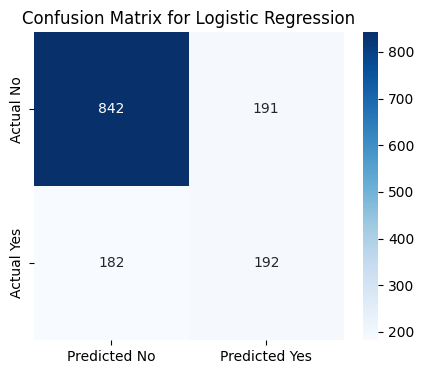

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.50      0.51      0.51       374

    accuracy                           0.73      1407
   macro avg       0.66      0.66      0.66      1407
weighted avg       0.74      0.73      0.74      1407



In [10]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Predicted No", "Predicted Yes"],
            yticklabels=["Actual No", "Actual Yes"])
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

print(classification_report(y_test, y_pred))


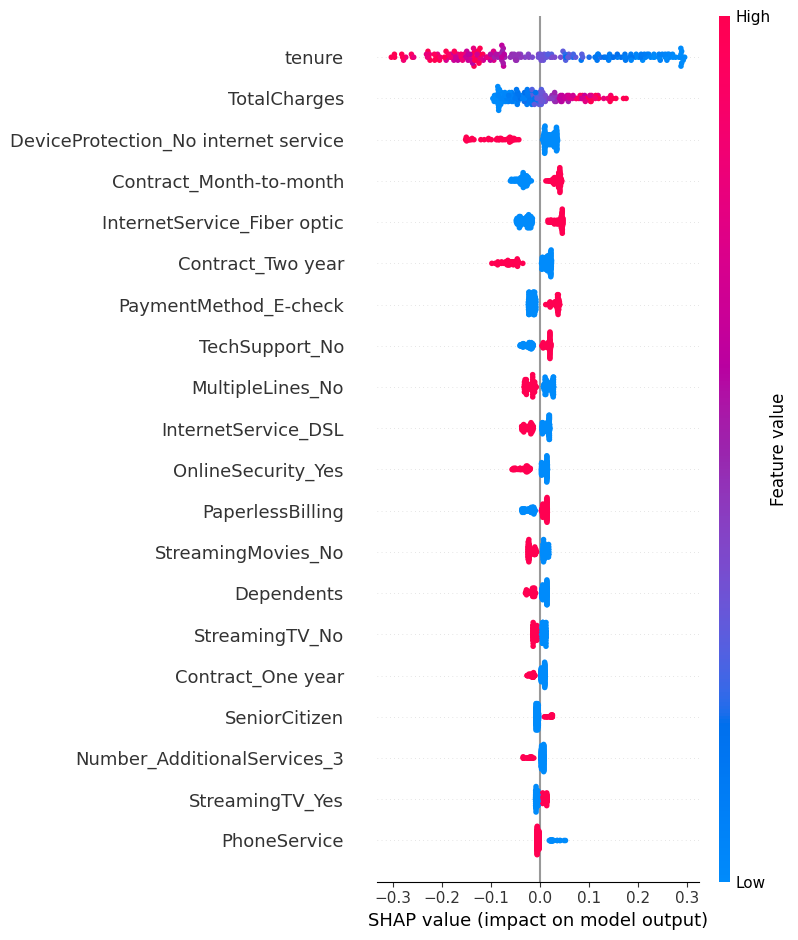

In [11]:
shap.summary_plot(shap_values, X_test_small, plot_type="dot")

feature importance plus direction of impact plus how feature values relate to the prediction

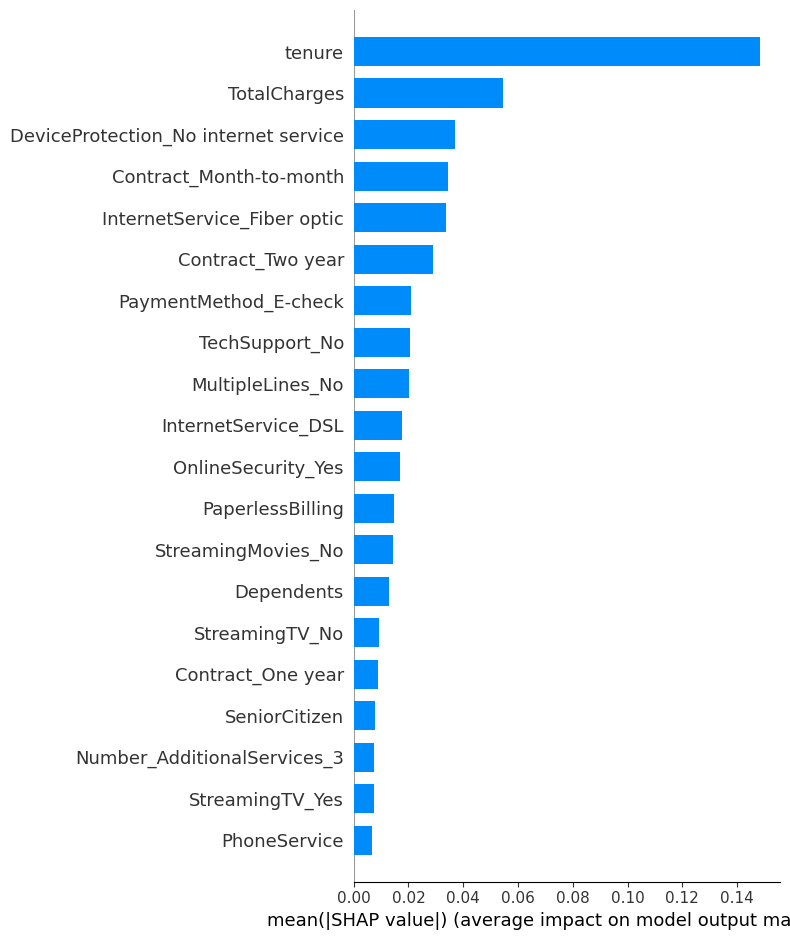

In [12]:
shap.summary_plot(shap_values, X_test_small, plot_type="bar")

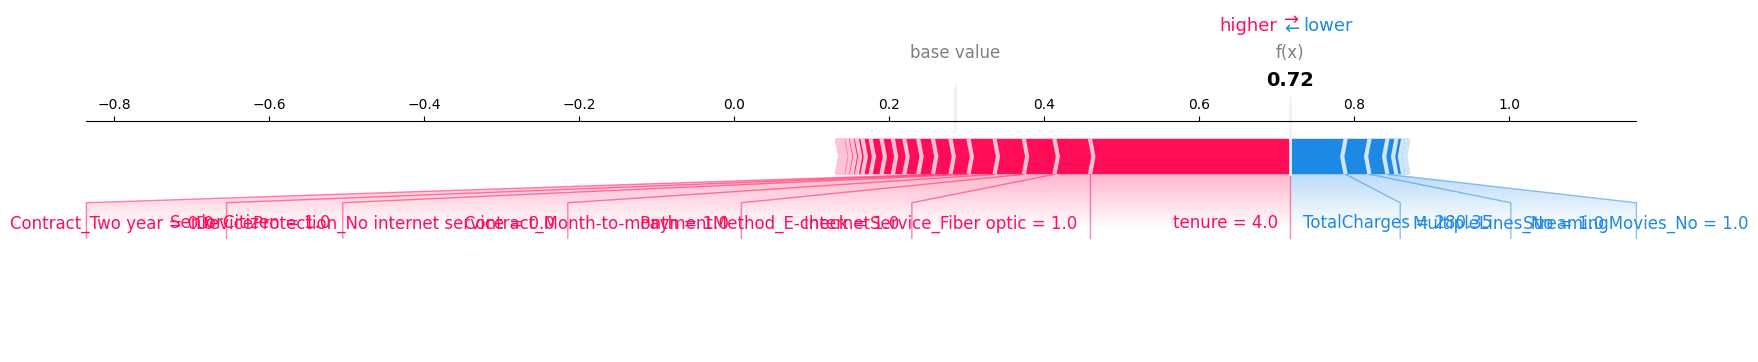

In [13]:
i = 10  # choose any row index

shap.force_plot(
    base_values,
    shap_values[i],
    X_test.iloc[i],
    matplotlib=True
)


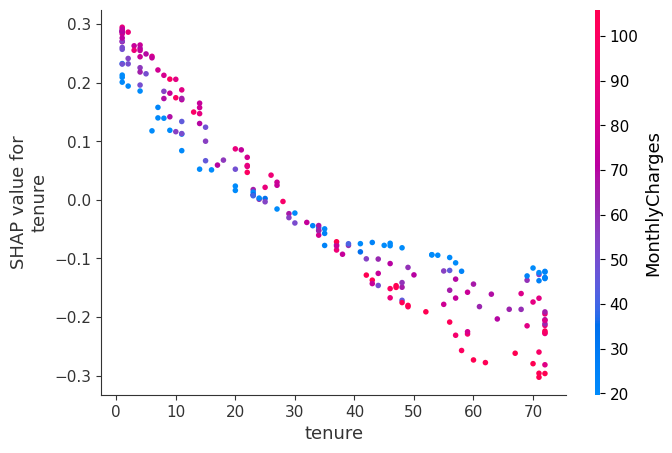

In [14]:
shap.dependence_plot("tenure", shap_values, X_test_small)


In [15]:
i = 10  # sample index
shap.force_plot(base_values, shap_values[i], X_test_small.iloc[i])


Identify misclassified users

In [26]:
results = X_test_small.copy()
results["y_true"] = y_test
results["y_pred"] = y_pred

fn = results[(results["y_true"] == 1) & (results["y_pred"] == 0)]
fp = results[(results["y_true"] == 0) & (results["y_pred"] == 1)]


Describe their profiles, what do the false negatives look like?

In [27]:
fn.describe(include="all")


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,MultipleLines_No,...,PaymentMethod_M-check,Number_AdditionalServices_0,Number_AdditionalServices_1,Number_AdditionalServices_2,Number_AdditionalServices_3,Number_AdditionalServices_4,Number_AdditionalServices_5,Number_AdditionalServices_6,y_true,y_pred
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.00000,20.000000,20.000000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.0,20.0,20.0,20.0
mean,0.65000,0.250000,0.500000,0.250000,21.400000,0.900000,0.65000,71.32750,1832.842500,0.250000,...,0.400000,0.250000,0.250000,0.150000,0.200000,0.150000,0.0,0.0,1.0,0.0
std,0.48936,0.444262,0.512989,0.444262,17.355115,0.307794,0.48936,27.82116,1779.573153,0.444262,...,0.502625,0.444262,0.444262,0.366348,0.410391,0.366348,0.0,0.0,0.0,0.0
min,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,20.60000,20.600000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0
25%,0.00000,0.000000,0.000000,0.000000,5.500000,1.000000,0.00000,54.20000,390.025000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0
50%,1.00000,0.000000,0.500000,0.000000,20.000000,1.000000,1.00000,76.50000,1395.875000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0
75%,1.00000,0.250000,1.000000,0.250000,34.750000,1.000000,1.00000,91.70000,2756.187500,0.250000,...,1.000000,0.250000,0.250000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0
max,1.00000,1.000000,1.000000,1.000000,49.000000,1.000000,1.00000,106.75000,5127.950000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.0,0.0


In [28]:
fn = false_negatives
tp = results[(results["y_true"] == 1) & (results["y_pred"] == 1)]

fn.mean(numeric_only=True) - tp.mean(numeric_only=True)


Actual                                         NaN
Contract_Month-to-month                  -0.192308
Contract_One year                         0.148352
Contract_Two year                         0.043956
Dependents                                0.137363
DeviceProtection_No                      -0.164835
DeviceProtection_No internet service      0.093407
DeviceProtection_Yes                      0.071429
InternetService_DSL                       0.192308
InternetService_Fiber optic              -0.285714
InternetService_No                        0.093407
MonthlyCharges                           -5.785714
MultipleLines_No                         -0.049451
MultipleLines_No phone service            0.082418
MultipleLines_Yes                        -0.032967
Number_AdditionalServices_0              -0.104396
Number_AdditionalServices_1              -0.181319
Number_AdditionalServices_2               0.005495
Number_AdditionalServices_3               0.164835
Number_AdditionalServices_4    

Compare key features

Group by categories

In [19]:
print(false_negatives.columns)


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank-transfer',
       'PaymentMethod_Credit-card', 'Paym

In [20]:
false_negatives.groupby(["Contract_Month-to-month", "Contract_One year", "Contract_Two year"]).size()
false_positives.groupby(["InternetService_DSL", "InternetService_Fiber optic", "InternetService_No"]).size()


InternetService_DSL  InternetService_Fiber optic  InternetService_No
0                    0                            1                      5
                     1                            0                     16
1                    0                            0                      8
dtype: int64

Explain why they were misclassified

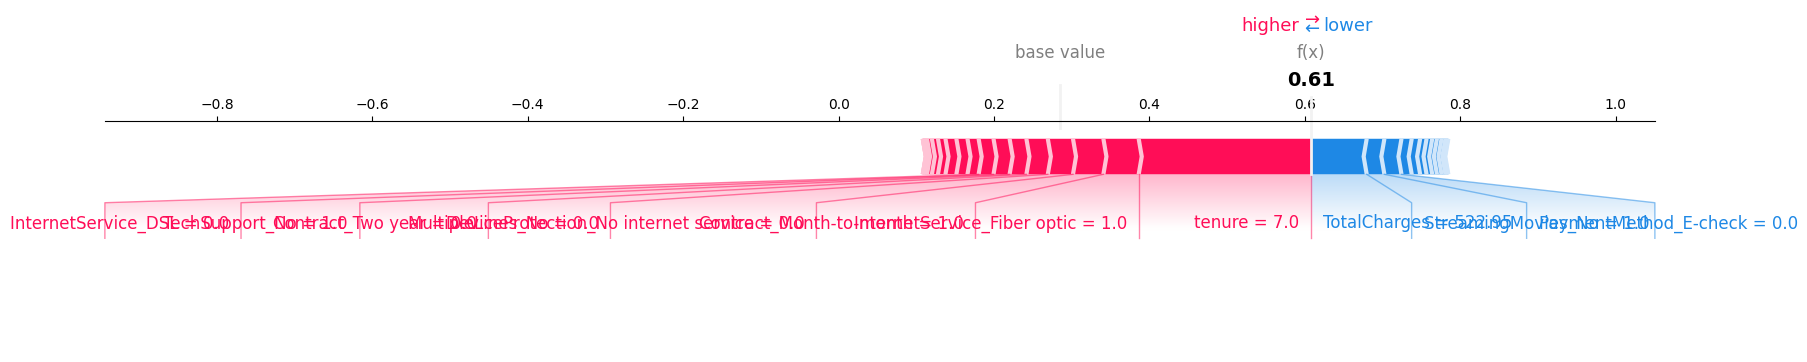

In [21]:
import shap

i = 1 # can change this to any row for any specific customer

shap.force_plot(
    base_values[i],
    shap_values[i],
    X_test_small.iloc[i],
    matplotlib=True
)

waterfall plot (put this one  in the report)

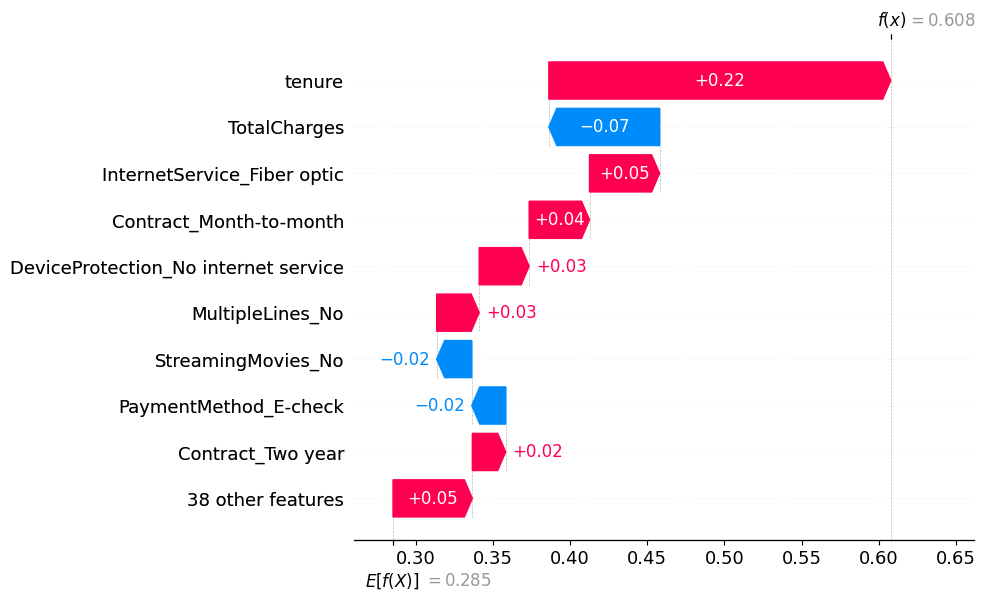

In [22]:
shap.plots._waterfall.waterfall_legacy(
    base_values[i],
    shap_values[i],
    feature_names=X_test_small.columns
)

for example here,
knowing nothing about the customer, there is a 28.5% chance they'll churn
each feature drives the likelihood up and down to finally a 20.5%
tenure suggests churn, but customer has on internet and low total charges, so overall unlikely to churn
but then they did churn, which is why they're a false negative

In [23]:
import pandas as pd

results = X_test.copy()
results["Actual"] = y_test.values
results["Predicted"] = y_pred.values

false_negatives = results[(results["Actual"] == 1) & (results["Predicted"] == 0)]
false_positives = results[(results["Actual"] == 0) & (results["Predicted"] == 1)]

print("FN:", false_negatives.shape)
print("FP:", false_positives.shape)


FN: (182, 49)
FP: (191, 49)


In [24]:
idx_fn = false_negatives.index[0]
idx_fp = false_positives.index[0]


identify false negatives

False Negative index: 3


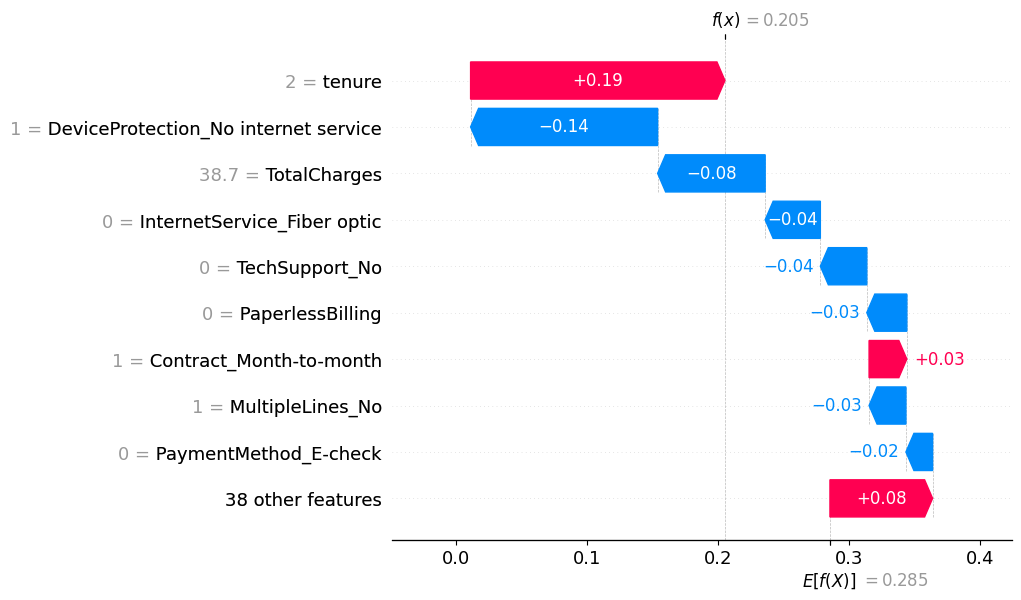

False Negative index: 14


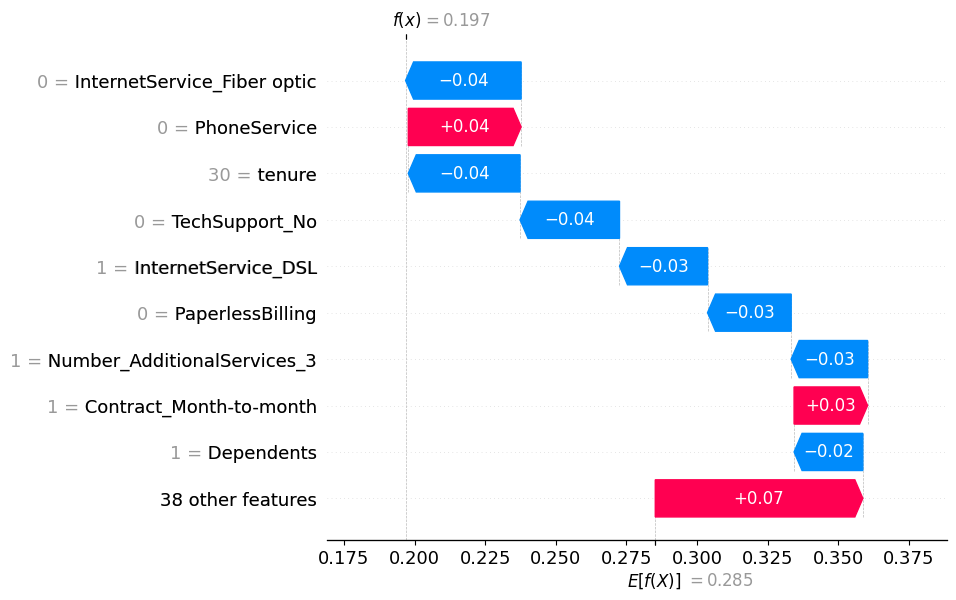

False Negative index: 23


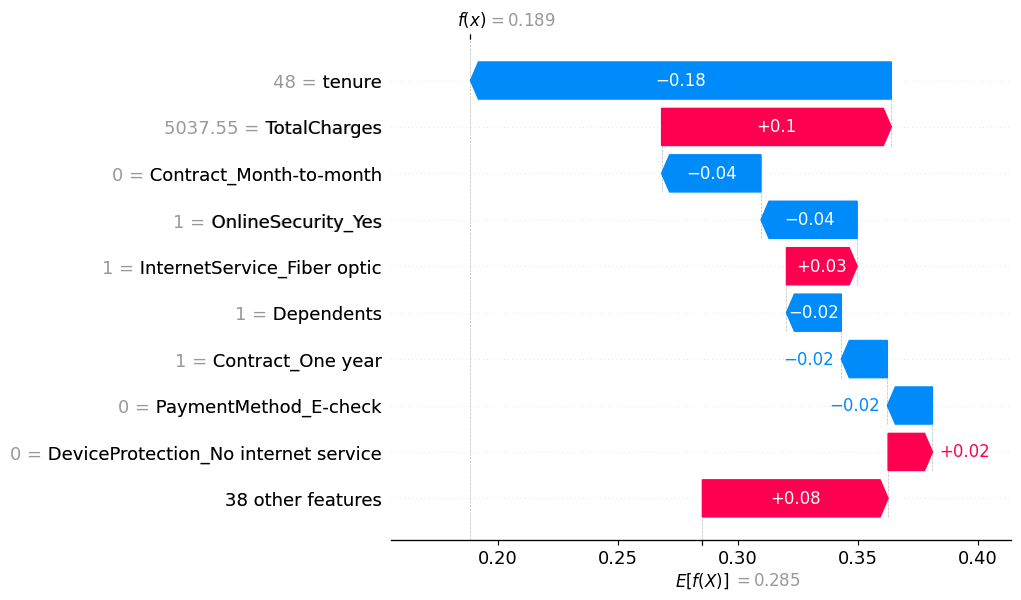

False Negative index: 25


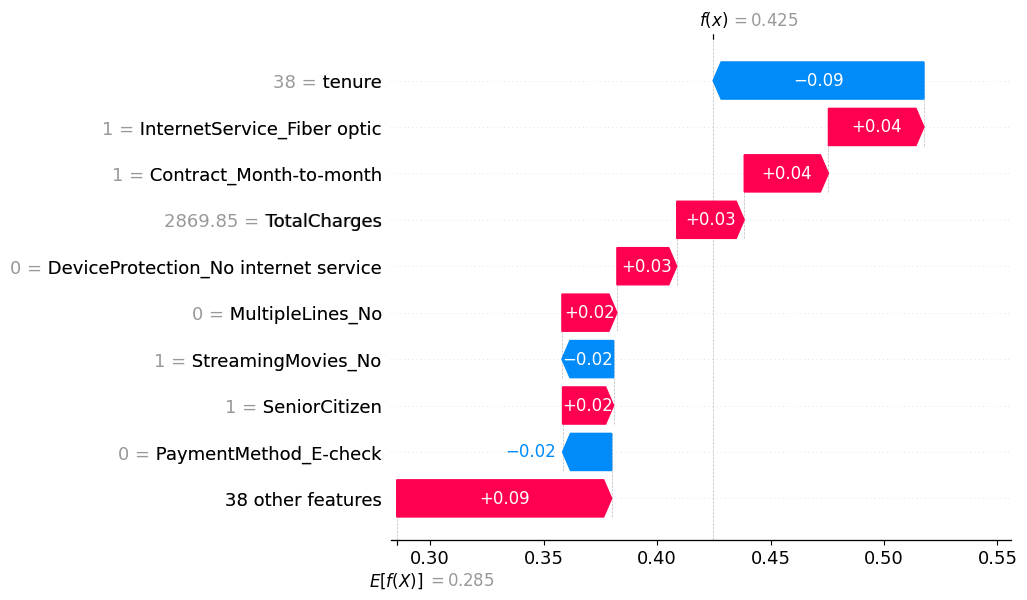

False Negative index: 38


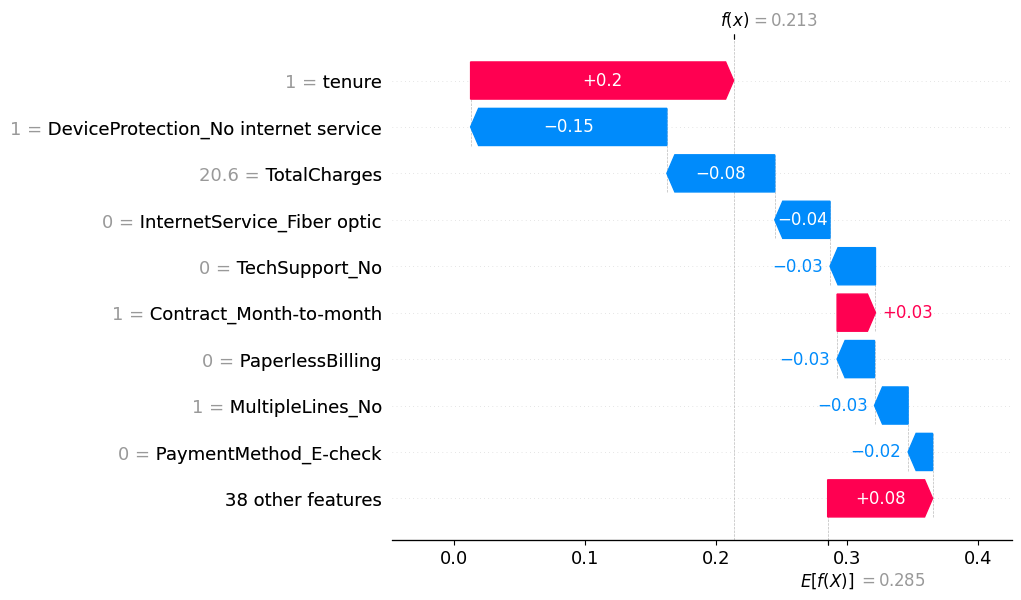

In [25]:
for idx in false_negatives.index[:5]:  # first 5 false negatives
    print(f"False Negative index: {idx}")
    shap.plots.waterfall(
        shap.Explanation(
            values=shap_values[idx],
            base_values=base_values[idx],
            data=X_test.iloc[idx],
            feature_names=X_test.columns
        )
    )
